# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">Học máy và ứng dụng 📝</p>

<p style="text-align:center">
    <a href="https://github.com/ITHealer?tab=repositories" target="_blank">
    <img src="avatar_healer.jpg" width="200" alt="Logo link github"  />
    </a>
    <b>4251050044 - Ung Minh Hoài</b> <br>
</p>

## 1. Import library

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

## 2. Prepare data 

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer() 
data.keys()  

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names']

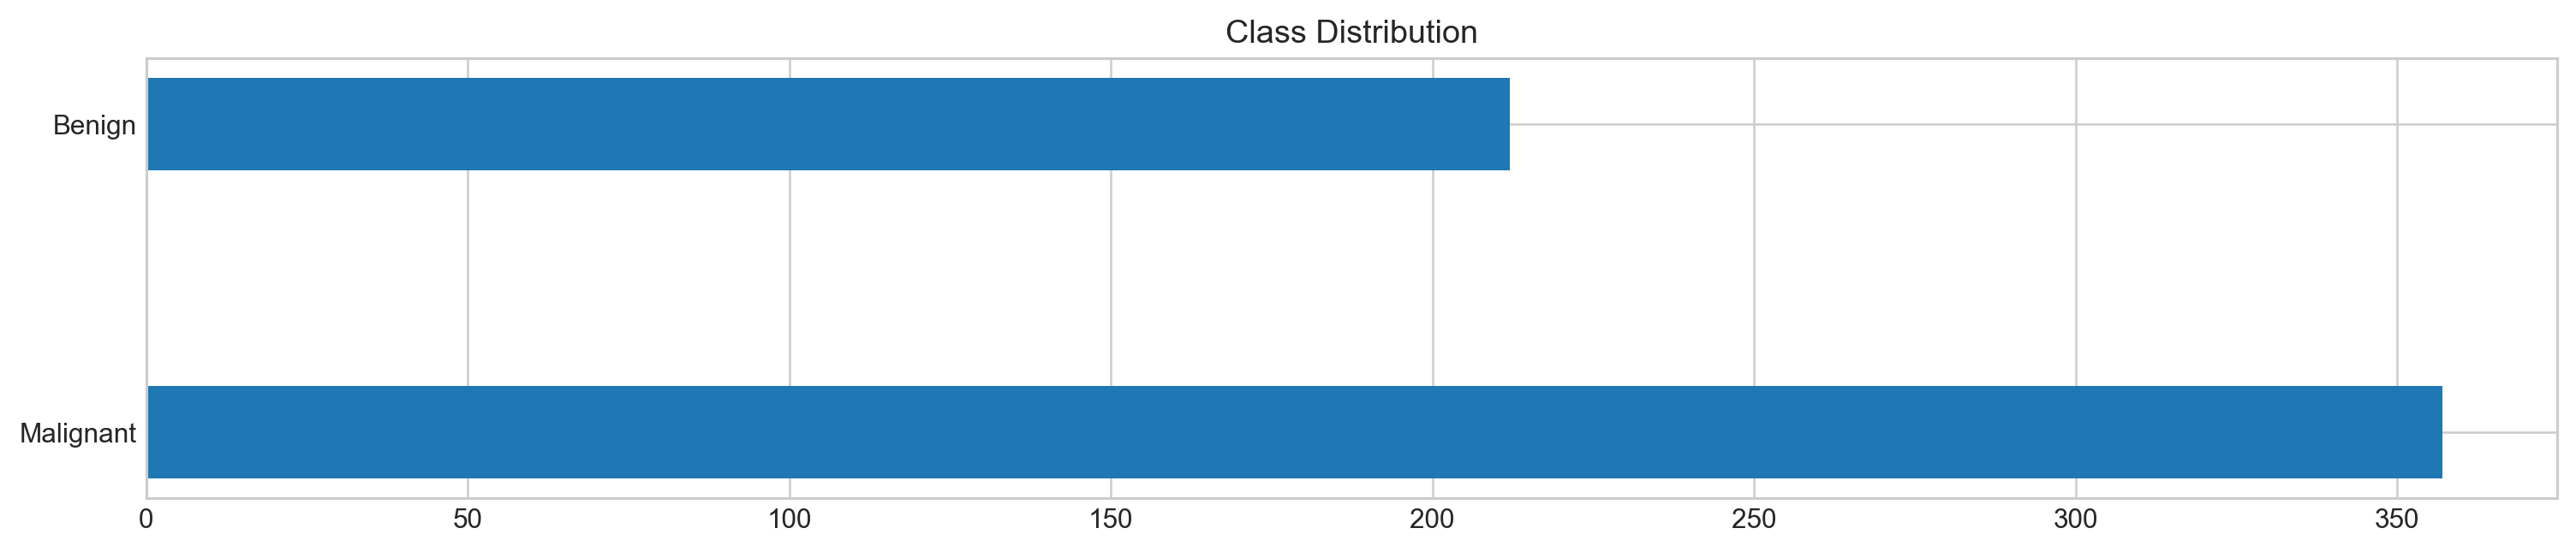

In [5]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,3)
plt.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3)
plt.title('Class Distribution')
plt.show()

## 3. Split train/test

In [4]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test=train_test_split(X,y) # test_size=0.25, random_state=42: thêm or k 

In [29]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [30]:
y_train.shape, y_test.shape

((426,), (143,))

## 3. Build model

In [6]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0)
score_pre = cross_val_score(rfc,X,y, cv = 10).mean()
score_pre

0.9649122807017545

In [7]:
score = []

for i in range(1,201,10):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 90, n_jobs = -1)
    result = cross_val_score(rfc,X,y,cv =10).mean()
    score.append(result)
print(max(score), score.index(max(score)))

0.9631265664160402 7


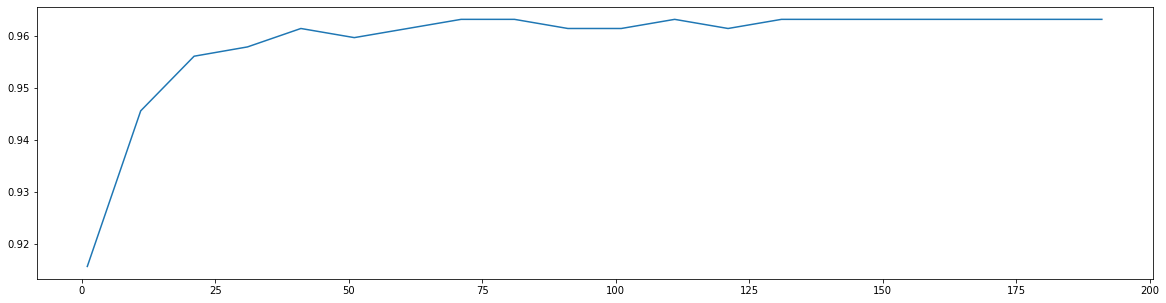

In [8]:
plt.figure(figsize = [20,5])
plt.plot(range(1,201,10),score)
plt.show()

In [8]:
# 1. Xây dựng mô hình
model = DecisionTreeClassifier(random_state=0)
# 2. Fit
model.fit(X_train, y_train)
# 3. Độ chính xác
model.score(X_test, y_test)

0.9230769230769231

In [11]:
y_pred = model.predict(X_test) 
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

## 4. Evaluation

## 5. Visualization

In [42]:
# !pip install mglearn

Feature importances: [0. 1.]


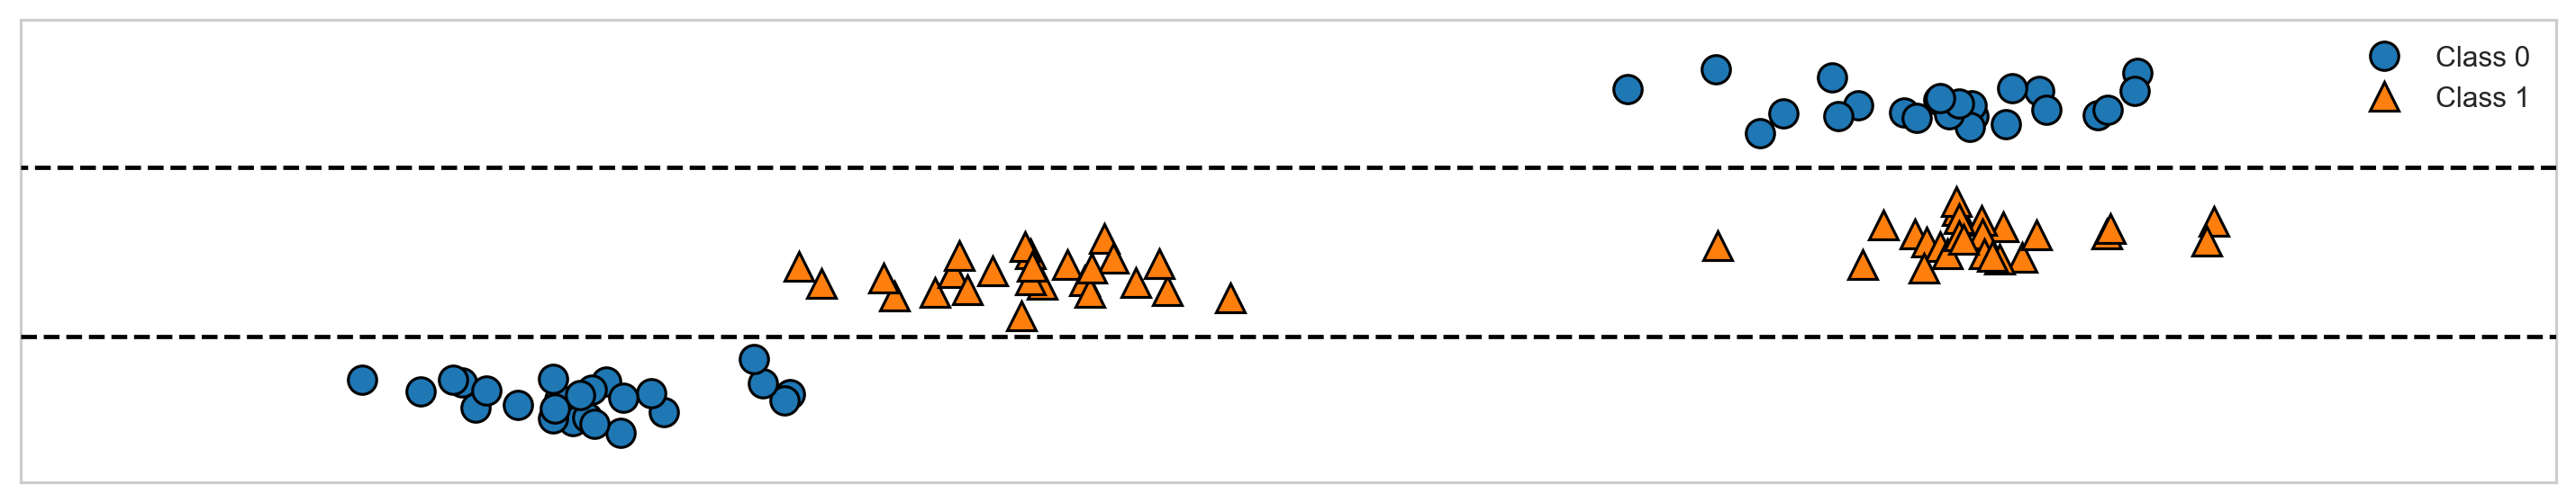

In [41]:
import mglearn
tree = mglearn.plots.plot_tree_not_monotone()

In [43]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# import graphviz

# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# from sklearn.tree import DecisionTreeClassifier

# cancer = load_breast_cancer()
# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# tree = DecisionTreeClassifier(random_state=0)
# tree.fit(X_train, y_train)

# tree = DecisionTreeClassifier(max_depth=4, random_state=0)
# tree.fit(X_train, y_train)

# from sklearn.tree import export_graphviz
# export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],feature_names=cancer.feature_names, impurity=False, filled=True)

# import graphviz
# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

## END